# Multiple Runs Analysis

Notebook to test functions for mutiple runs simultaneously.

In [2]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat

import matplotlib.pyplot as plt
import numpy as np 

## Single Run Test

In [3]:
run395=prep.Load(395)

In [4]:
freq = run395[0]["freq"]
fft = run395[0]["fft"]
weights = run395[0]["weights"]
center = run395[0]["center"]
ref = run395[0]["ref"]

Text(0, 0.5, 'FFT')

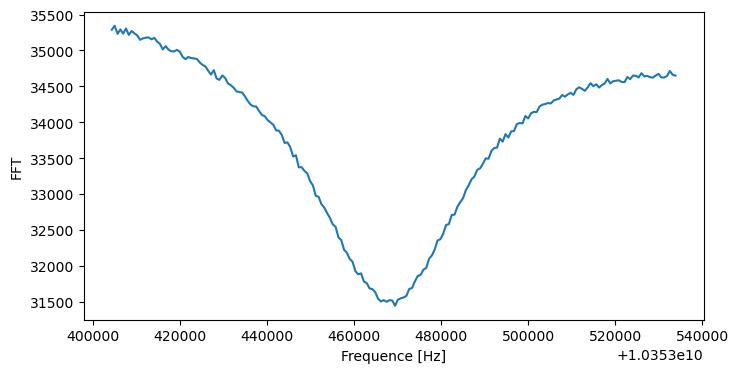

In [5]:
fig = plt.figure(figsize=(8, 4))
plt.plot(freq, fft)
plt.xlabel('Frequence [Hz]')
plt.ylabel('FFT')

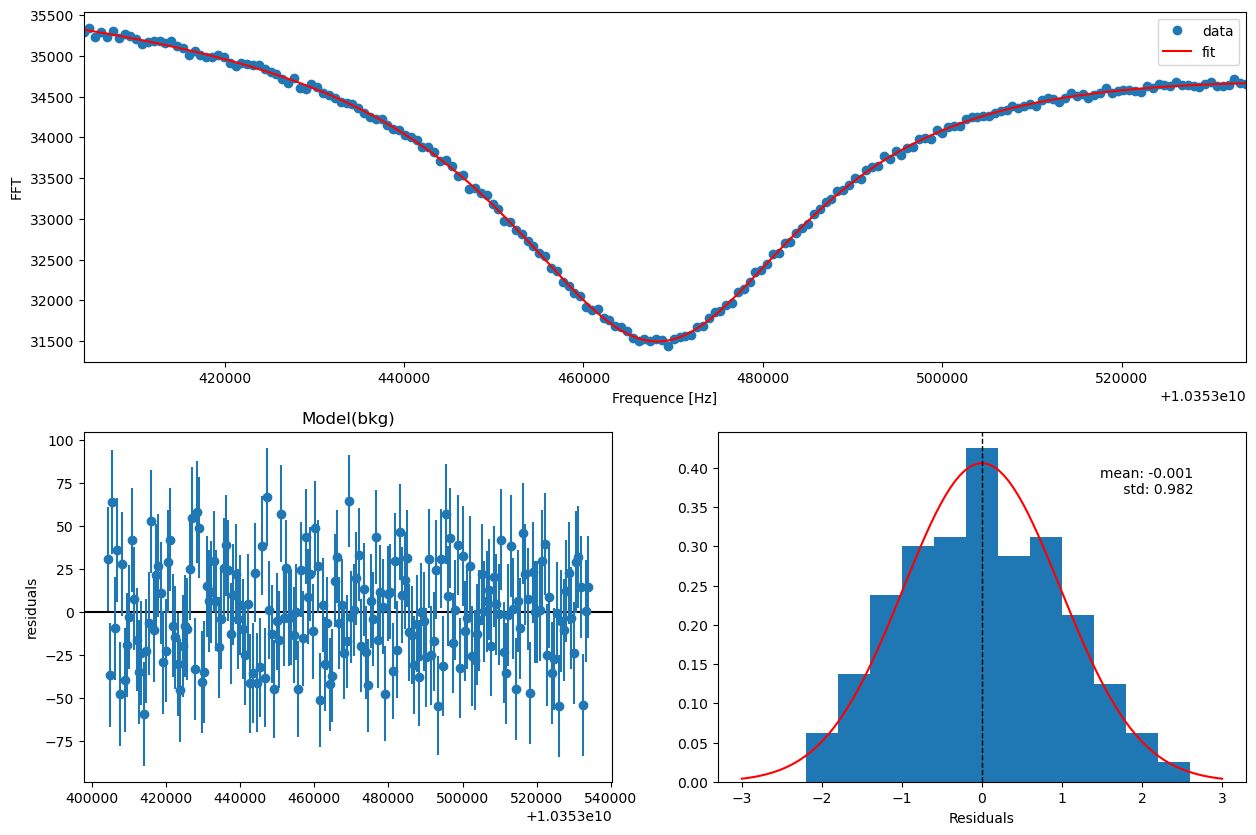

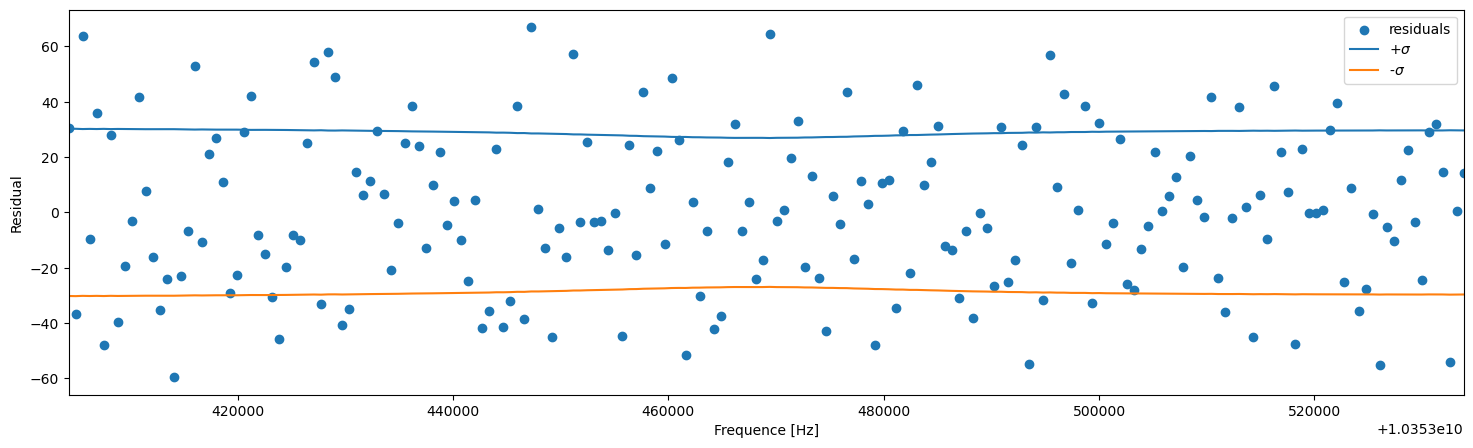

In [6]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

In [7]:
fitBkg=fits.multipleFitBKG(run395)
fitBkg[0]

{'run': 'db/AnalyzedDataFFT_Run_395_sliced.xlsx',
 'background_bestParams': {'a': 10353468601.731169,
  'b': 20070.362875535502,
  'c': 10353468691.596733,
  'd': 21269.063148061265,
  'e': 188.07503303460376,
  'f': -0.006495168594883054},
 'background_bestfit': array([35320.39258373, 35308.39611531, 35296.20015035, 35283.7979878 ,
        35271.18265648, 35258.34690287, 35245.28317852, 35231.98362629,
        35218.44006654, 35204.64398246, 35190.58650451, 35176.25839443,
        35161.65002858, 35146.75138012, 35131.55200079, 35116.04100191,
        35100.20703415, 35084.03826688, 35067.52236664, 35050.64647434,
        35033.39718204, 35015.76050879, 34997.72187524, 34979.26607777,
        34960.37726182, 34941.03889395, 34921.23373364, 34900.94380436,
        34880.15036356, 34858.83387268, 34836.97396676, 34814.54942336,
        34791.53813189, 34767.91706332, 34743.66223973, 34718.74870523,
        34693.15049832, 34666.84062508, 34639.79103549, 34611.97260253,
        34583.355

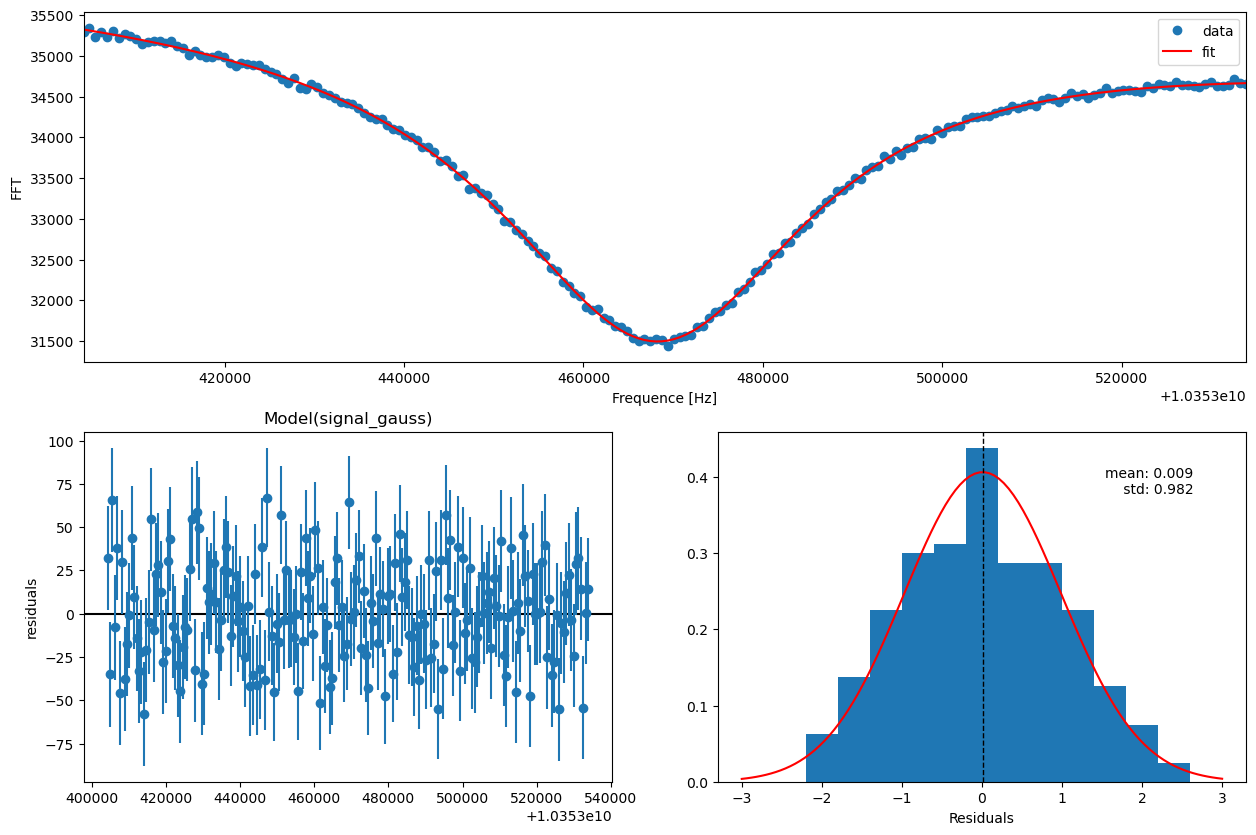

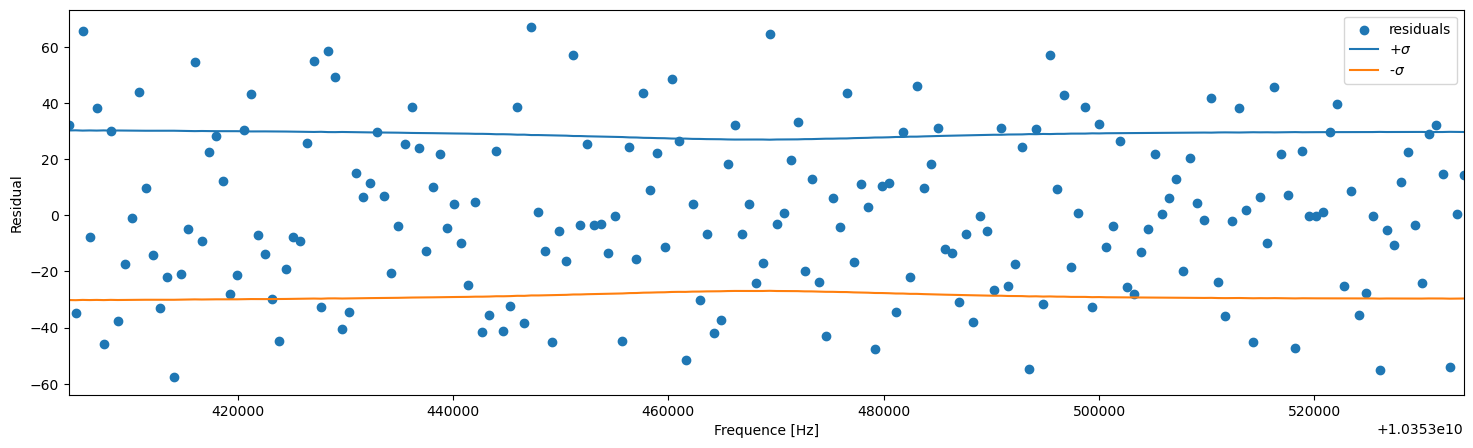

In [8]:
x0 = 1.0353e+10+410000
bkg_params = res_bkg.best_values
res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
fits.plot_fit(freq, fft, weights, res_sig)

In [9]:
fitSig=fits.multipleFitSIG(run395, fitBkg, x_0=x0)
fitSig[0]

{'run': 'db/AnalyzedDataFFT_Run_395_sliced.xlsx',
 'signal_bestParams': {'a': 10353468601.731169,
  'b': 20070.362875535502,
  'c': 10353468691.596733,
  'd': 21269.063148061265,
  'e': 188.07503303460376,
  'f': -0.006495168594883054,
  'mu': 2.105311915558208,
  'x0': 10353410000.0,
  's': 10416},
 'signal_bestfit': array([35322.20482857, 35310.26779466, 35298.12567617, 35285.77118533,
        35273.19682173, 35260.39486989, 35247.35739525, 35234.0762379 ,
        35220.54300444, 35206.74905751, 35192.68550259, 35178.34317244,
        35163.71260911, 35148.78404288, 35133.54736909, 35117.99212256,
        35102.10744938, 35085.88207702, 35069.30428259, 35052.36185912,
        35035.04208093, 35017.33166797, 34999.21674888, 34980.68282411,
        34961.7147287 , 34942.29659463, 34922.41181388, 34902.04300195,
        34881.17196144, 34859.77964701, 34837.84613121, 34815.350571  ,
        34792.2711759 , 34768.58517778, 34744.26880146, 34719.29723786,
        34693.64461924, 34667.283

## Multiple Runs Test

In [10]:
x0 = 1.0353e+10+410000

In [11]:
runsData = prep.Load()

In [12]:
fitBkg_tot = fits.multipleFitBKG(runsData)

In [13]:
fitSig2=fits.multipleFitSIG(runsData, fitBkg_tot, x_0=x0)
fitSig2

[{'run': 'db/AnalyzedDataFFT_Run_389_sliced.xlsx',
  'signal_bestParams': {'a': 10353522219.620491,
   'b': 20852.957817490726,
   'c': 10353522435.553326,
   'd': 21974.32490149998,
   'e': 186.9973868189828,
   'f': -0.00589732628477138,
   'mu': 1.2913012881199393e-09,
   'x0': 10353410000.0,
   's': 10416},
  'signal_bestfit': array([34781.9585845 , 34769.8846774 , 34757.6142303 , 34745.14102585,
         34732.45861121, 34719.56028824, 34706.43910307, 34693.08783541,
         34679.49898764, 34665.66477291, 34651.57710321, 34637.22757705,
         34622.60746616, 34607.70770219, 34592.51886285, 34577.03115727,
         34561.23441114, 34545.11805149, 34528.67109054, 34511.88210953,
         34494.73924207, 34477.23015673, 34459.34203965, 34441.06157682,
         34422.37493572, 34403.26774714, 34383.72508692, 34363.73145727,
         34343.2707686 , 34322.32632171, 34300.88078983, 34278.91620189,
         34256.41392665, 34233.35465742, 34209.71839883, 34185.48445548,
         341

In [14]:
freq_tot = np.zeros(shape=(len(runsData), 200))
for i, run in enumerate(runsData):
    freq_tot[i] = run["freq"]

min_f = np.min(freq_tot)
max_f = np.max(freq_tot)
print(min_f, max_f)

freq_range = np.linspace(min_f, max_f, 1000)

10353286067.708334 10353587239.583334


In [ ]:
mu_fit = np.empty(len(freq_range))
for i in range(len(freq_range)):
    fit = fits.multipleFitSIG(runsData, fitBkg_tot, x_0=freq_range[i])
    mu_fit[i] = fit[0]["signal_bestParams"]["mu"]

In [ ]:
plt.plot(freq_range, mu_fit)